In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display, HTML

list_EI = ["log_2023_12_12_21_37_37.csv","log_2023_12_12_21_54_30.csv","log_2023_12_12_22_09_05.csv", "log_2023_12_12_22_25_52.csv", "log_2023_12_12_22_40_25.csv"]
list_HitofudeEI0_1 = ["log_2023_12_13_01_24_34.csv","log_2023_12_13_01_43_16.csv","log_2023_12_13_02_01_09.csv", "log_2023_12_13_02_17_18.csv", "log_2023_12_13_02_33_27.csv"]
list_HitofudeEI1 = ["log_2023_12_12_23_00_57.csv","log_2023_12_12_23_20_50.csv","log_2023_12_12_23_36_47.csv", "log_2023_12_12_23_54_39.csv", "log_2023_12_13_00_14_02.csv"]
list_UCB2 = ["log_2023_12_13_02_49_34.csv","log_2023_12_13_03_06_28.csv","log_2023_12_13_03_25_27.csv", "log_2023_12_13_03_40_00.csv", "log_2023_12_13_03_57_45.csv"]
list_UCB0_1 = ["log_2023_12_13_04_18_20.csv","log_2023_12_13_04_35_18.csv","log_2023_12_13_04_49_26.csv", "log_2023_12_13_05_01_32.csv", "log_2023_12_13_05_15_39.csv"]
list_HitofudeUCB1_2 = ["log_2023_12_13_05_32_36.csv","log_2023_12_13_05_46_04.csv","log_2023_12_13_06_04_04.csv", "log_2023_12_13_06_19_43.csv", "log_2023_12_13_06_38_01.csv"]


pdEI = []
pdHitofudeEI0_1pd = []
pdHitofudeEI1 = []
pdUCB2 = []
pdUCB0_1 = []
pdHitofudeUCB1_2 = []


for i in range(5):
    pdEI.append(pd.read_csv(list_EI[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    
    pdHitofudeEI0_1pd.append(pd.read_csv(list_HitofudeEI0_1[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    
    pdHitofudeEI1.append(pd.read_csv(list_HitofudeEI1[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    
    pdUCB2.append(pd.read_csv(list_UCB2[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    
    pdUCB0_1.append(pd.read_csv(list_UCB0_1[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    
    pdHitofudeUCB1_2.append(pd.read_csv(list_HitofudeUCB1_2[i], 
    names = ["n","y","ymax","x0","x1","x2","x3","x4","x5","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS"))
    

Alldata = [pdEI, pdHitofudeEI0_1pd, pdHitofudeEI1, pdUCB2, pdUCB0_1 , pdHitofudeUCB1_2]
#AlldataName = ["Random EI", "Random one-stroke(sigma=0.1) EI", "Random one-stroke(sigma=1) EI", "Random UCB(beta=2)", "", "Random UCB(beta=0.1)", "Random one-stroke(sigma=1) UCB(beta=2)"]
AlldataNameE = ["Random EI", "Random one-stroke(sigma=0.1) EI", "Random one-stroke(sigma=1) EI", "Random UCB(beta=2)", "Random UCB(beta=0.1)", "Random one-stroke(sigma=1) UCB(beta=2)"]

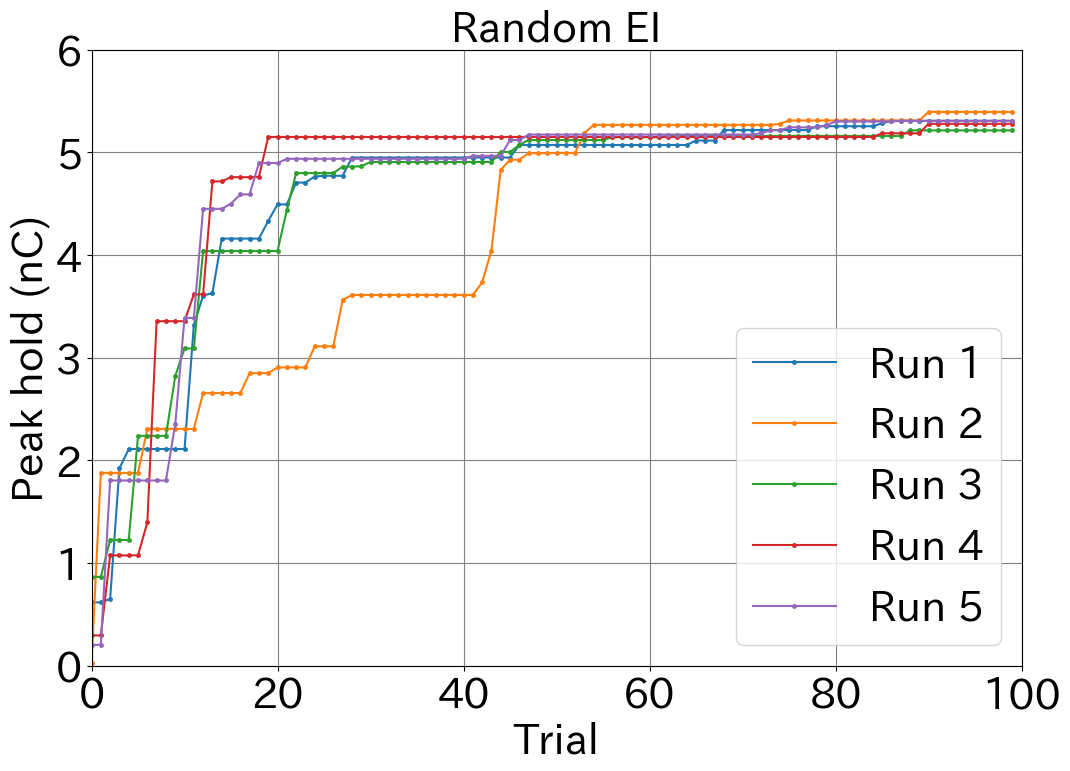

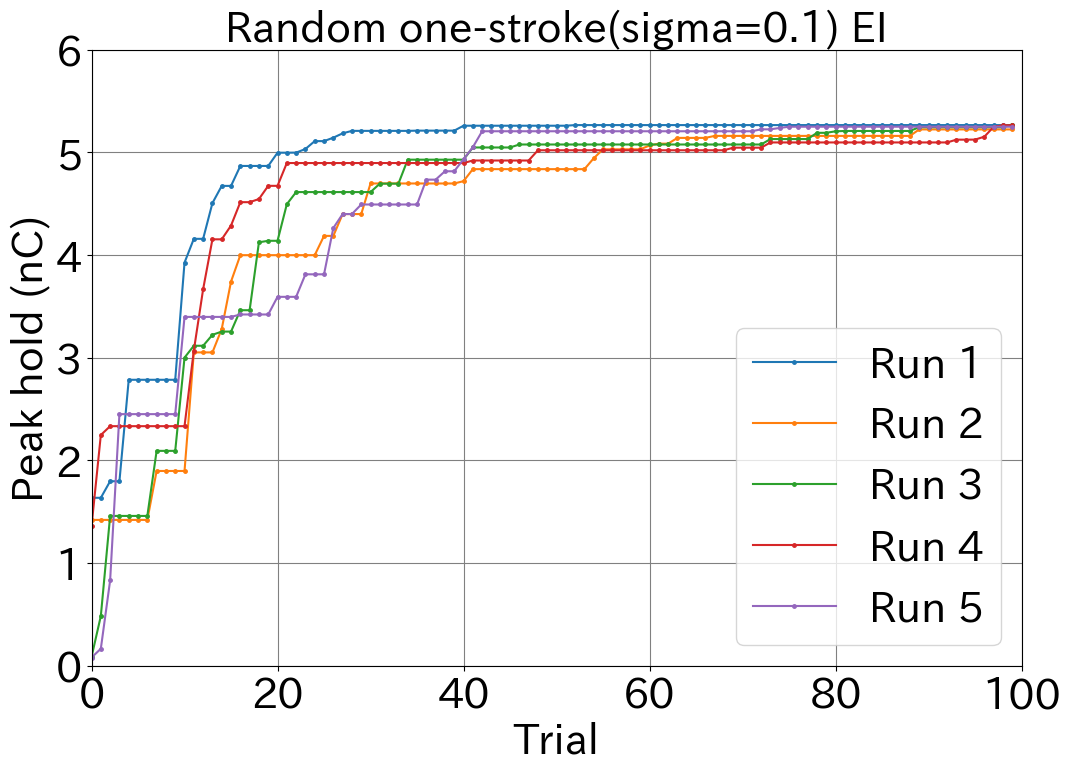

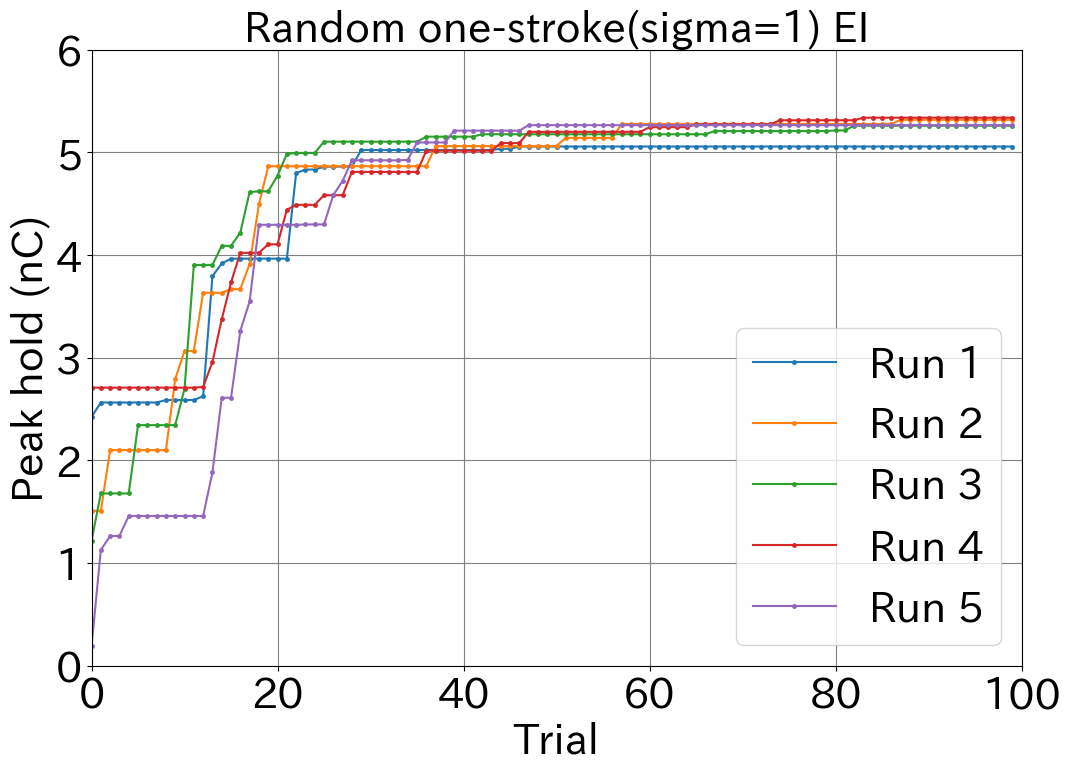

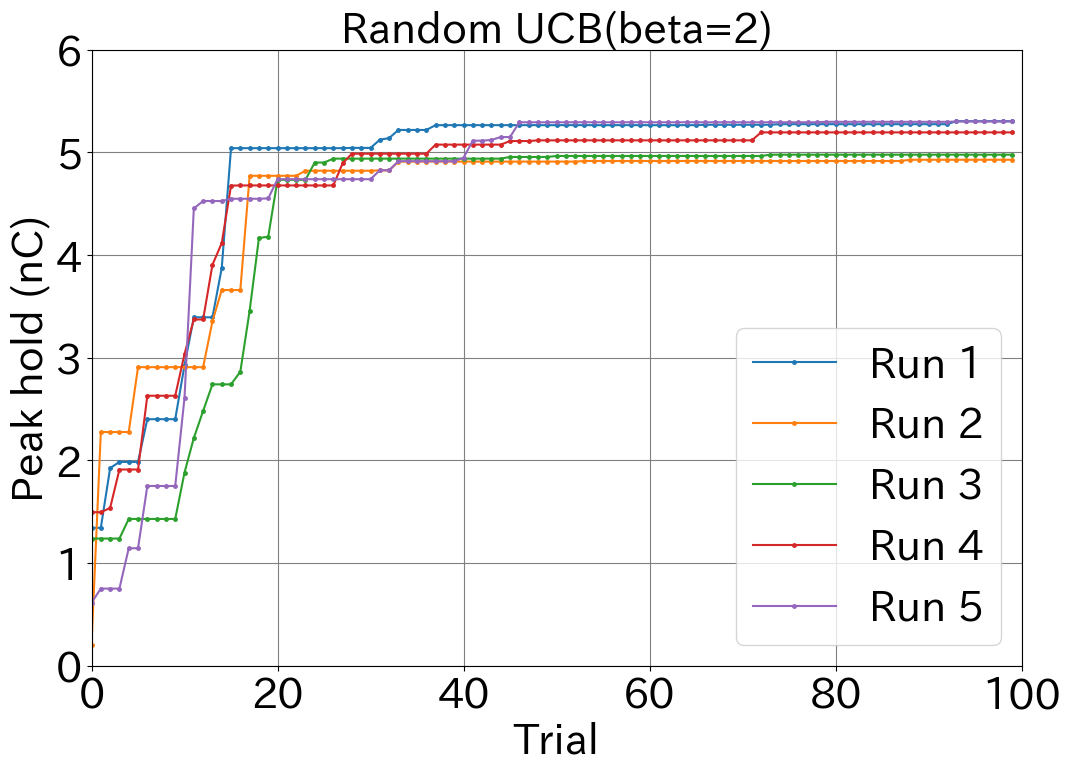

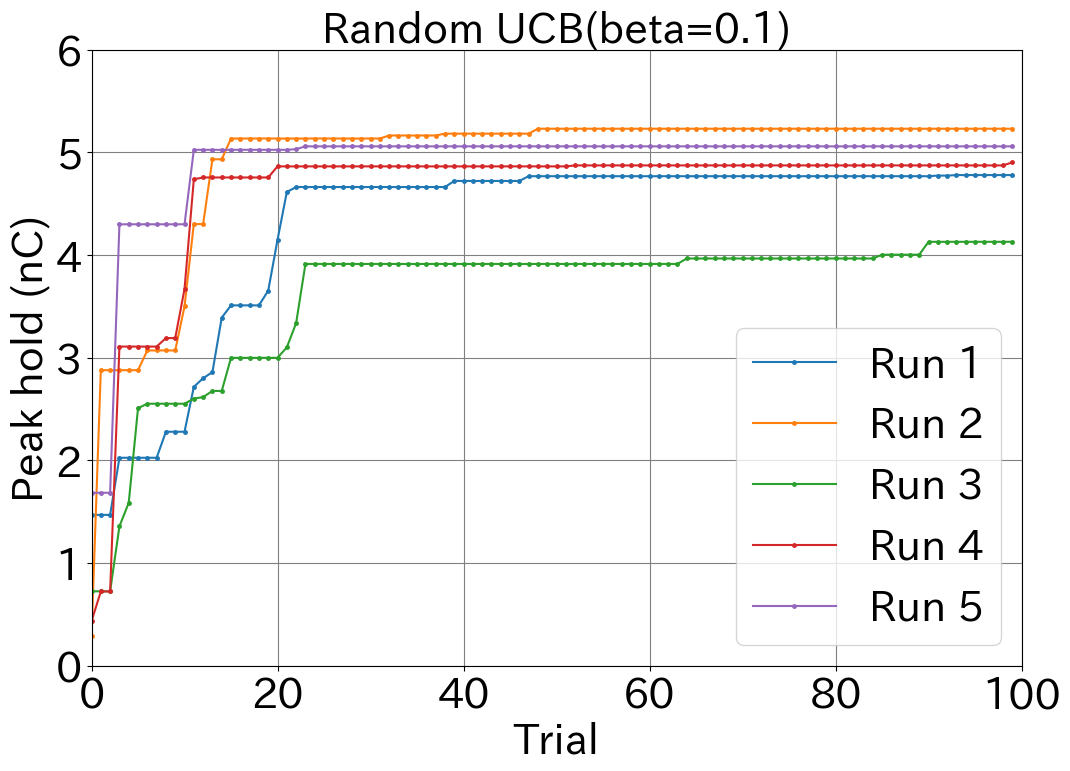

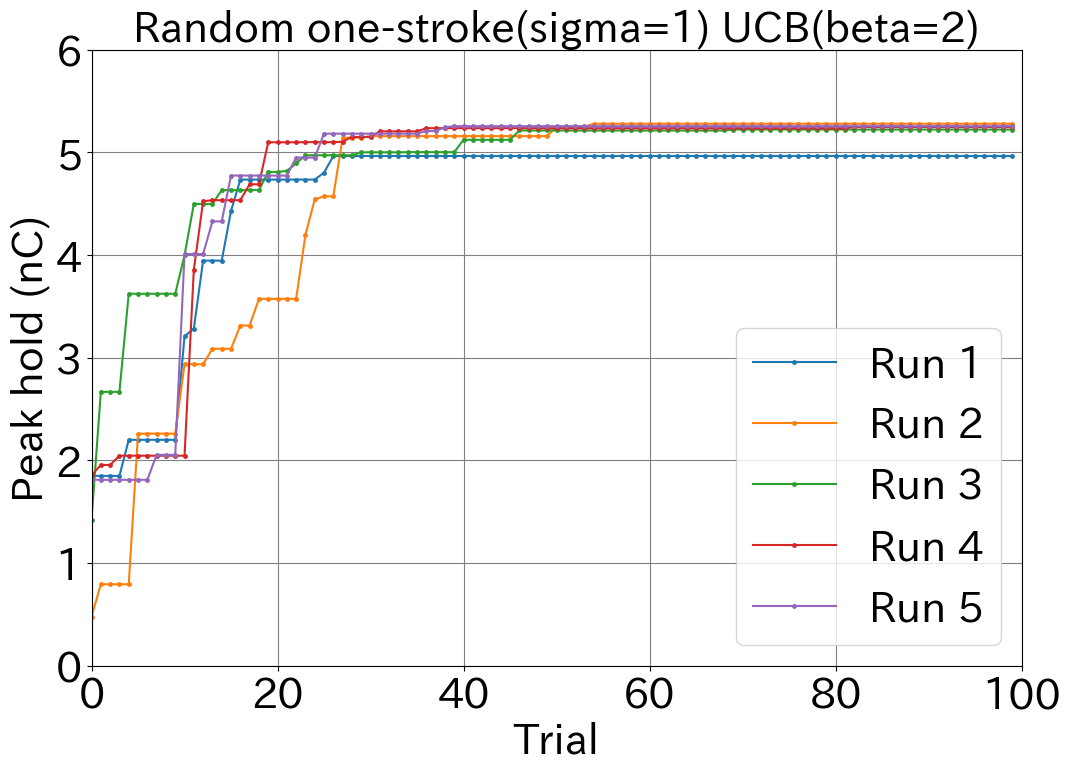

In [16]:
for j in range (6):

    fig_sum_j,ax_sum_j = plt.subplots(1,1,figsize=[12,8])

    for i in range (len(Alldata[j])):

        plt.plot(Alldata[j][i]["n"],Alldata[j][i]["ymax"], marker = "." , markersize = 5, label = "Run " + str(i+1))
    plt.tick_params(labelsize=30)
    ax_sum_j.grid(which = "major" , color = "gray" , linestyle = "-")
    ax_sum_j.set_xlabel("Trial", fontsize=30)
    ax_sum_j.set_xlim(0,100)
    ax_sum_j.set_ylabel("Peak hold (nC)", fontsize=30)
    ax_sum_j.set_ylim(0,6)
    ax_sum_j.legend(fontsize=30)
    ax_sum_j.set_title(AlldataNameE[j], fontsize=30)
    fig_sum_j.savefig(AlldataNameE[j] + " peakhold.png")

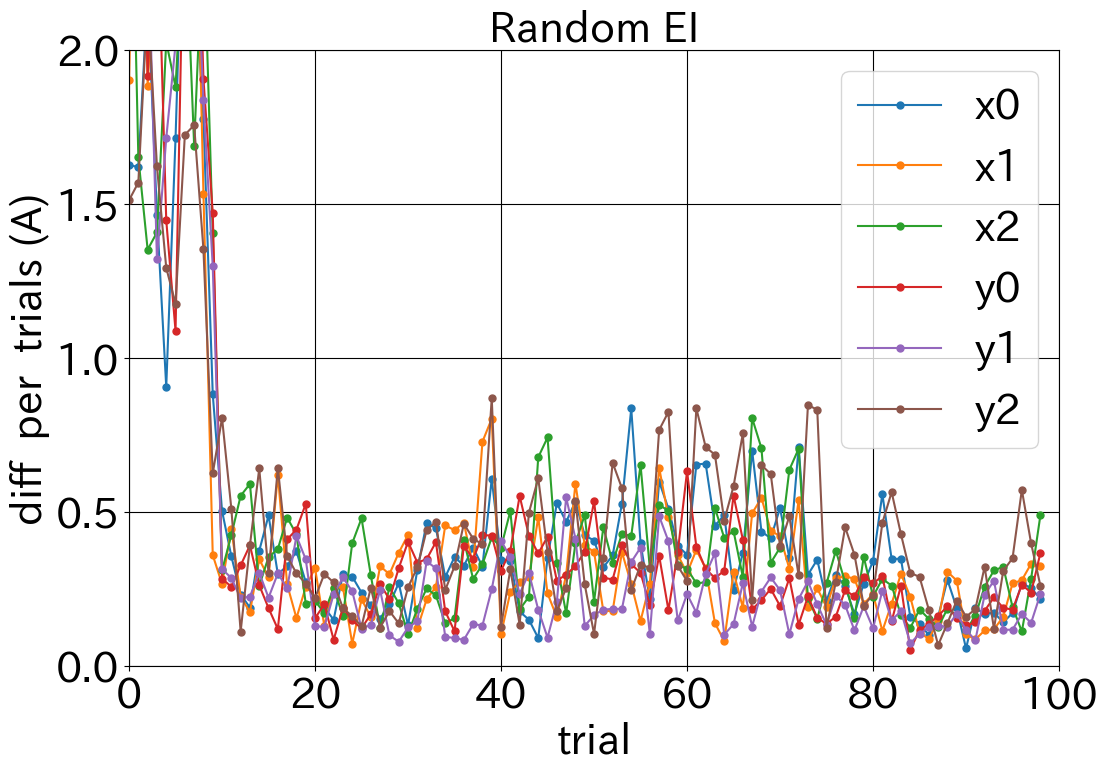

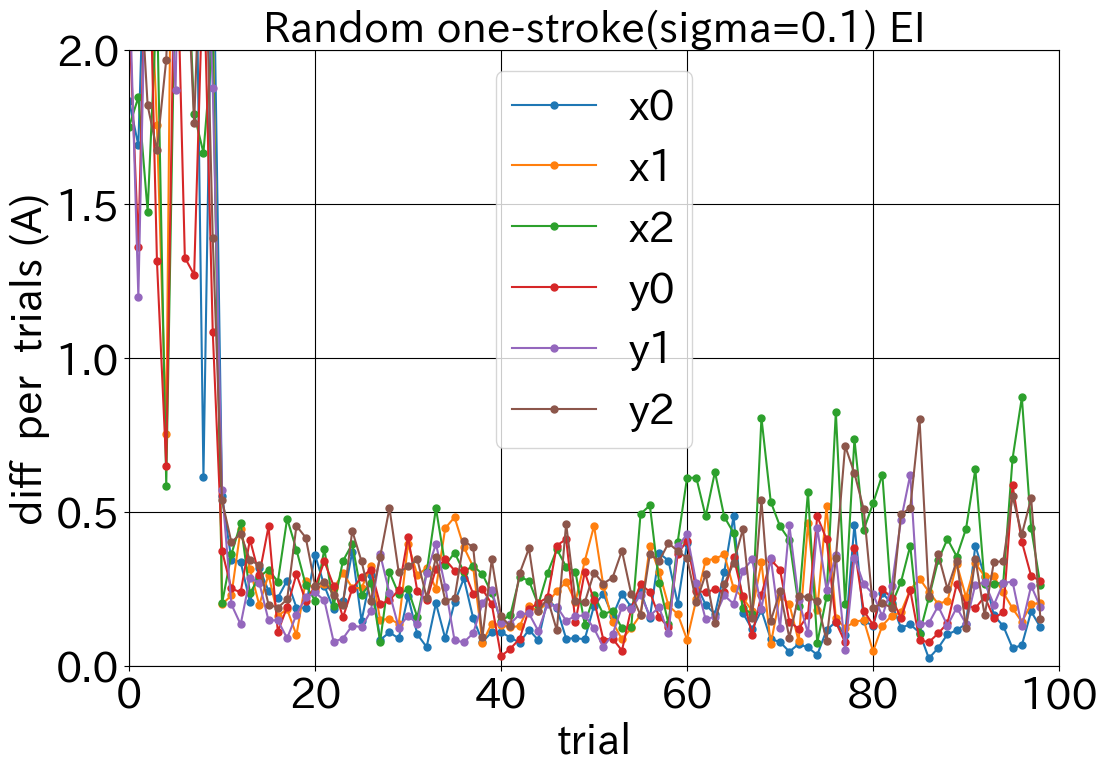

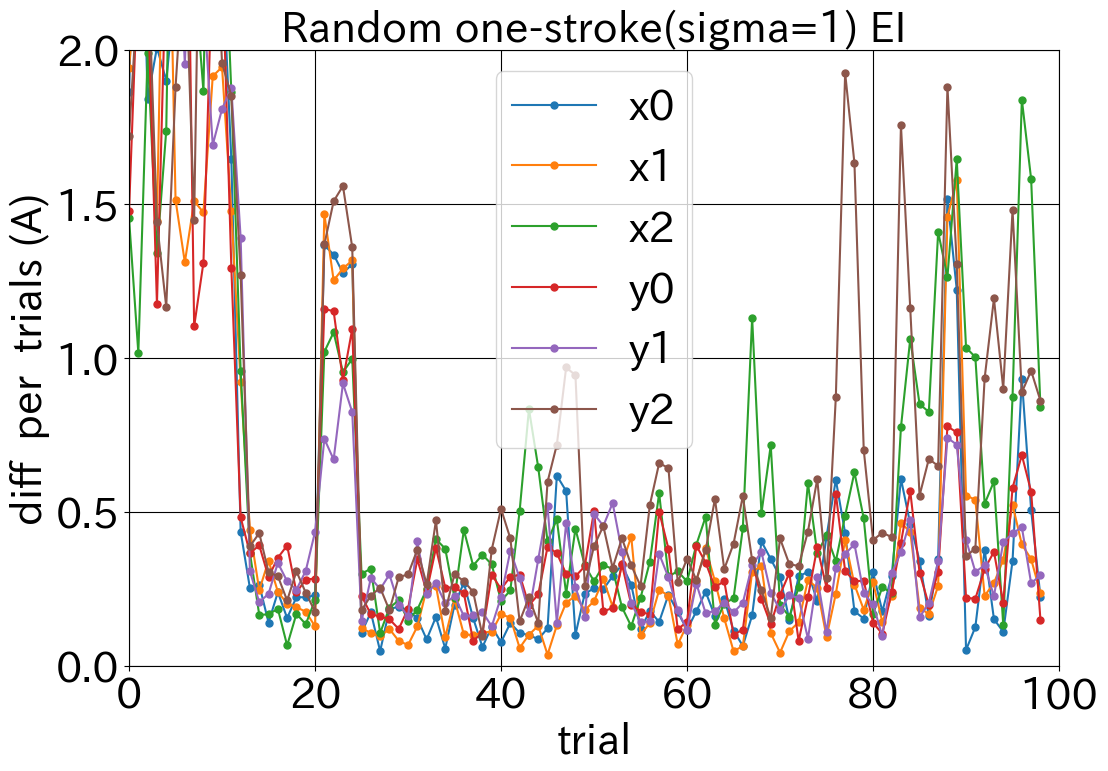

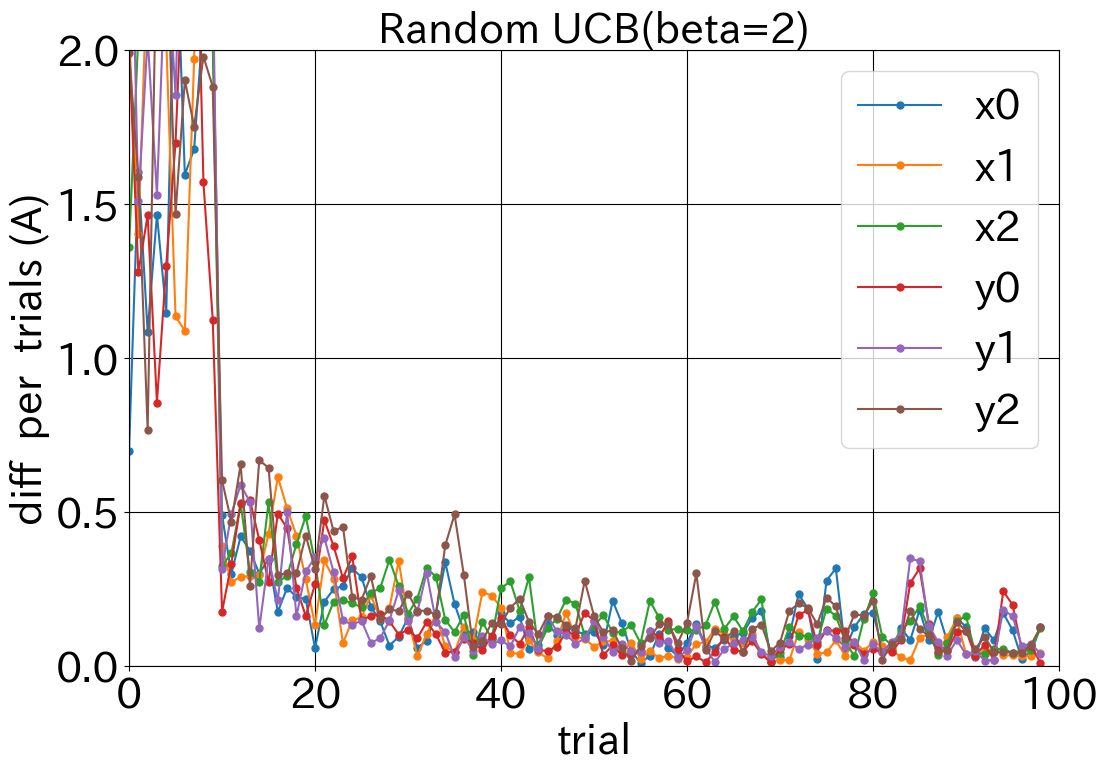

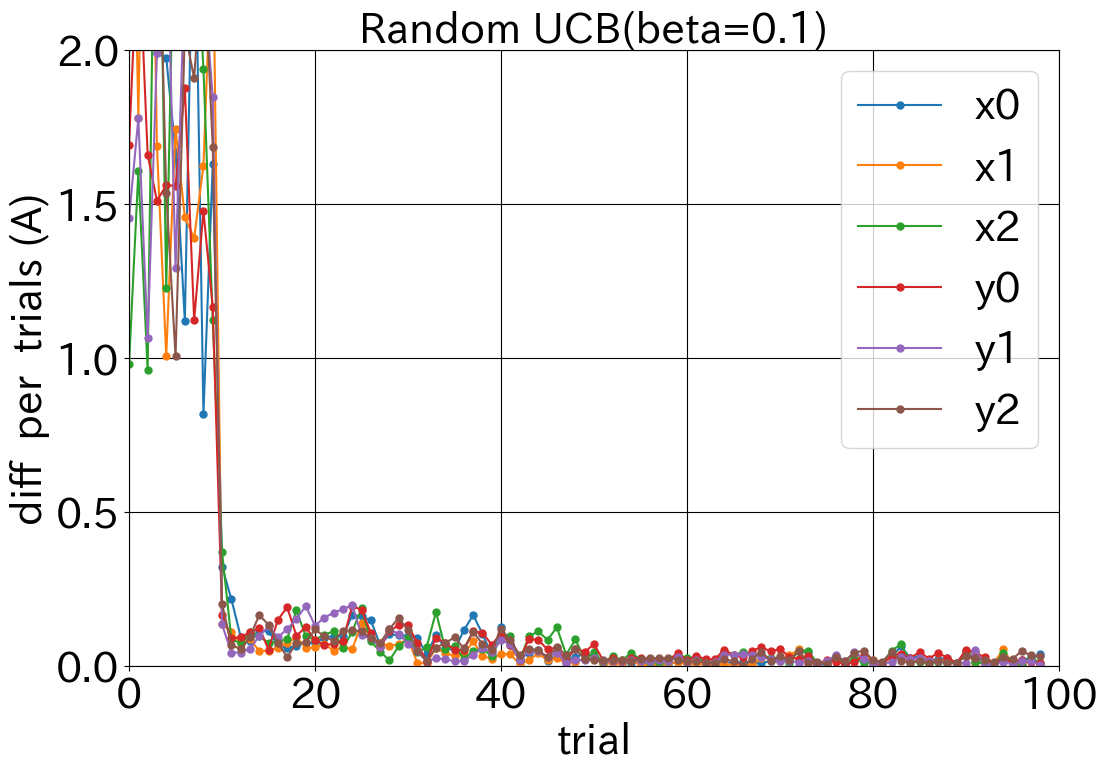

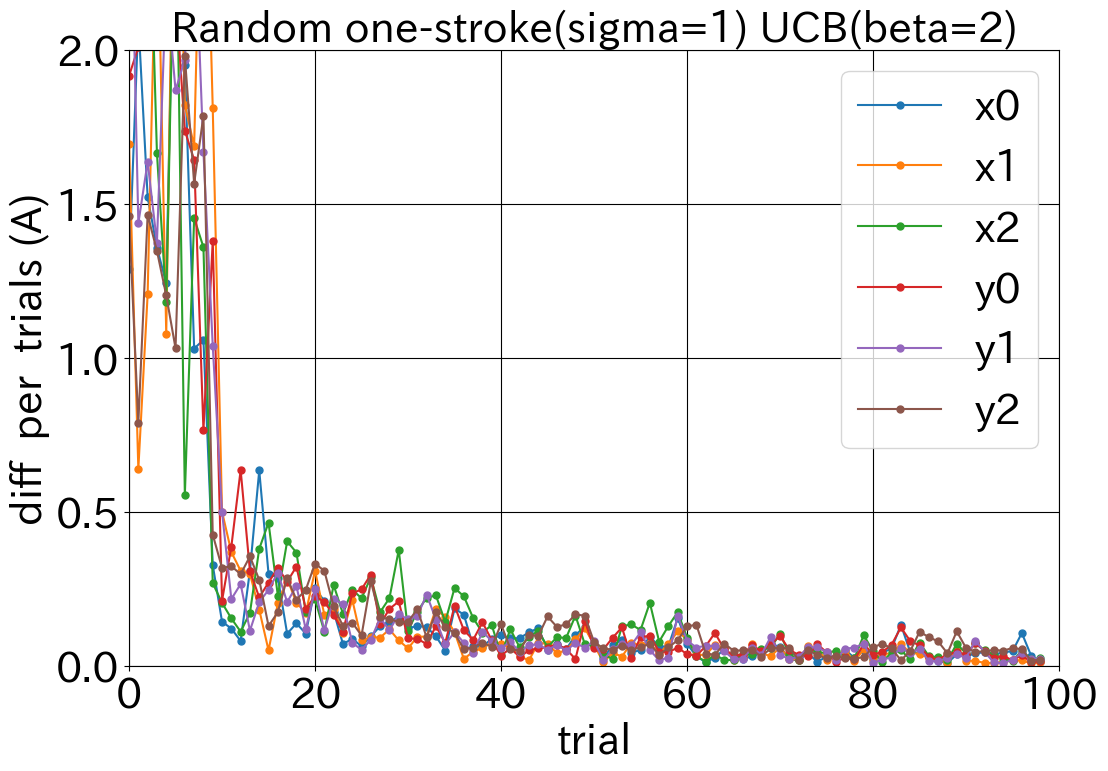

In [17]:
xxx = []
xx = []
x = [] 
a = []

mean_qp = []
mean_p = []
b = 0

numbers = [i for i in range(0, 99)]
for r in range (6): #All dataの数
    for k in range (len(Alldata[r])): #runの数
        for j in range (6): #パラメータの指定
            for i in range (99): #セルの列数

                a.append(abs(Alldata[r][k]["x" + str(j)][i+1] - Alldata[r][k]["x" + str(j)][i]))
            
            x.append(a)
            a = []
            
        xx.append(x)
        x = []
    
    xxx.append(xx)
    xx = []
    
    fig_r,ax_r = plt.subplots(1,1,figsize=[12,8])
    
    for p in range (6):
        for q in range (99): 
            for m in range (len(Alldata[r])):
                b = b + xxx[r][m][p][q]
            
            mean_qp.append(b/(m+1))
            b = 0
            
        mean_p.append(mean_qp)
        mean_qp = []


    for n in (0,2,4):
        
        plt.plot(numbers,mean_p[n], marker = "." , markersize = 10 , label = "x" + str(int(n/2)))

    for n in (1,3,5):
        
        plt.plot(numbers,mean_p[n], marker = "." , markersize = 10 , label = "y" + str(int((n-1)/2)))


    ax_r.grid(which = "major" , color = "black" , linestyle = "-")
    ax_r.set_xlabel("trial", fontsize=30)
    ax_r.set_xlim(0,100)
    ax_r.set_ylabel("diff  per  trials (A)", fontsize=30)
    ax_r.set_ylim(0,2)
    ax_r.legend(fontsize=30)
    ax_r.set_title(AlldataNameE[r], fontsize=30)
    ax_r.tick_params(labelsize=30)
    mean_p = []
    fig_r.savefig(AlldataNameE[r] + " diff.png")


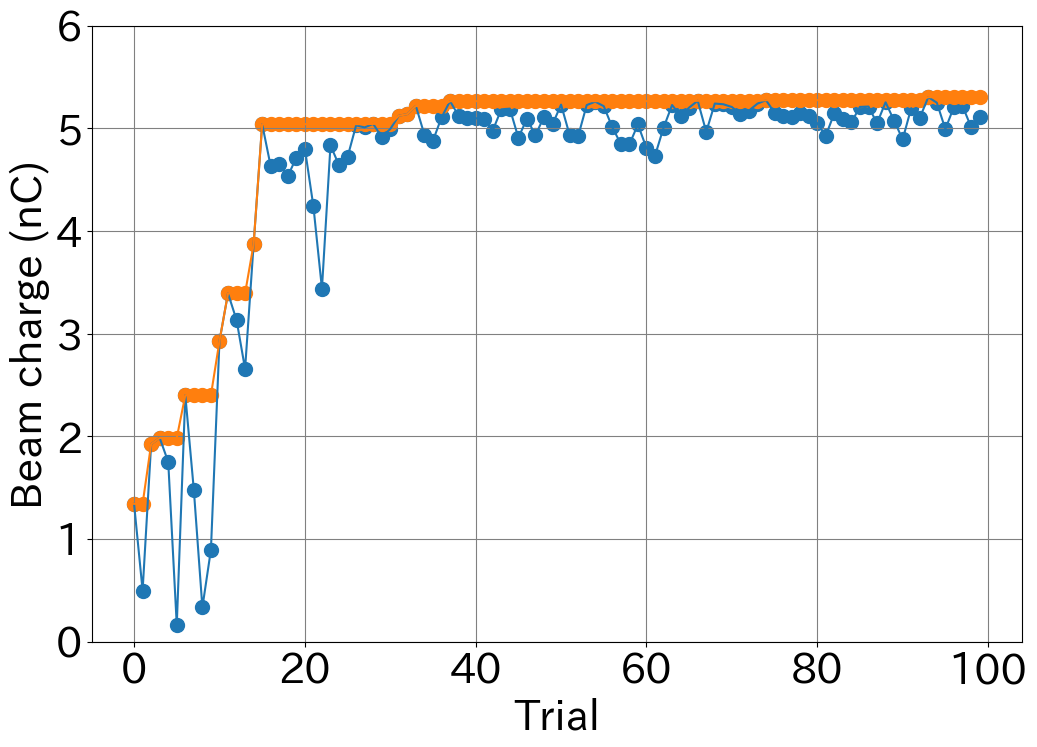

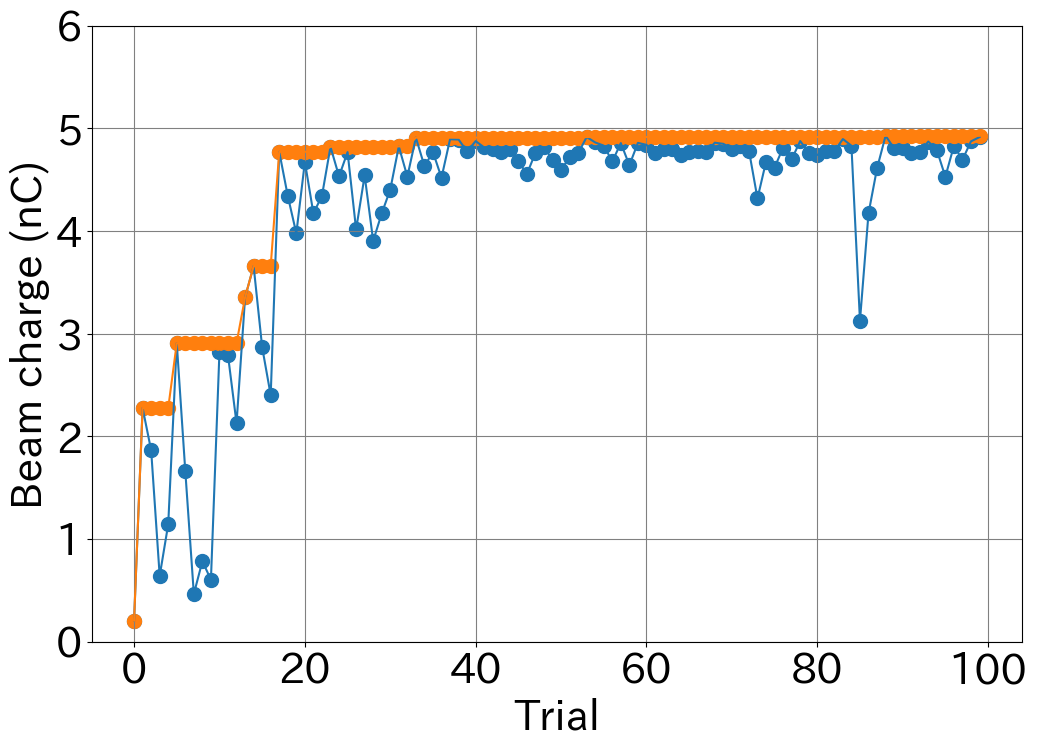

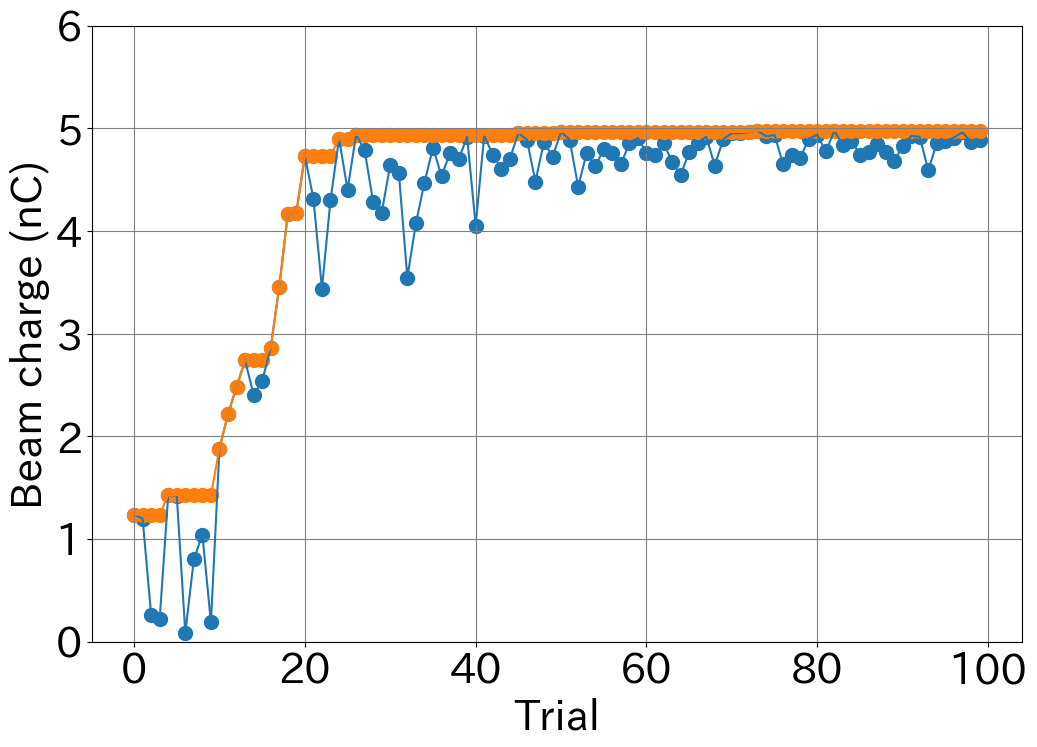

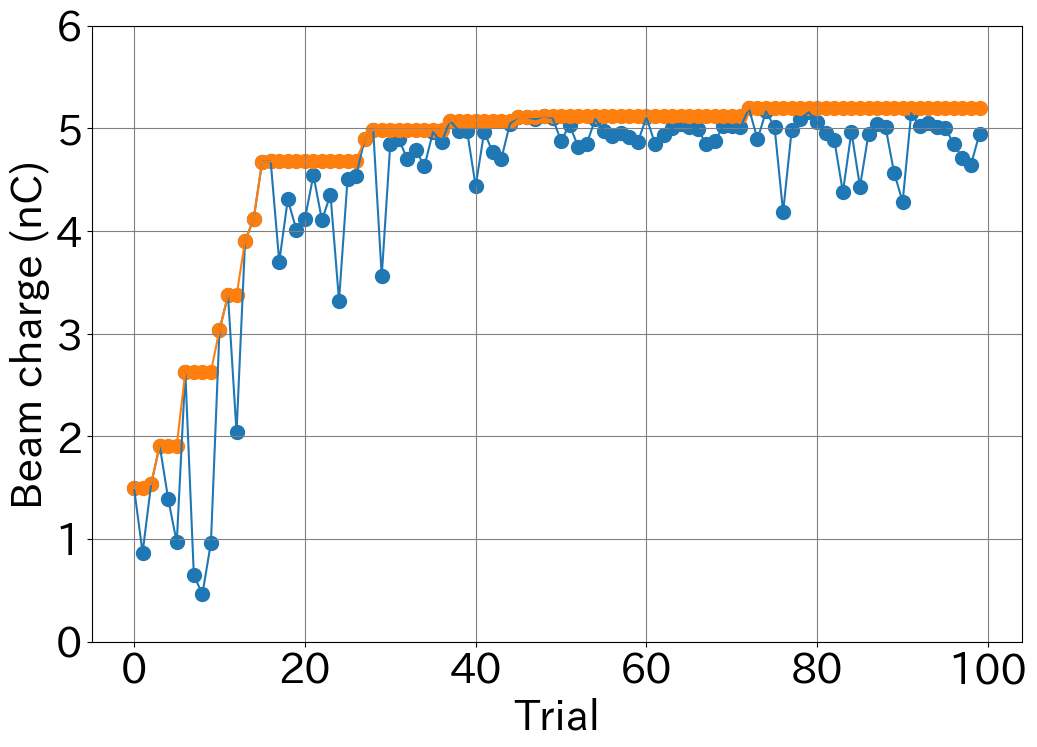

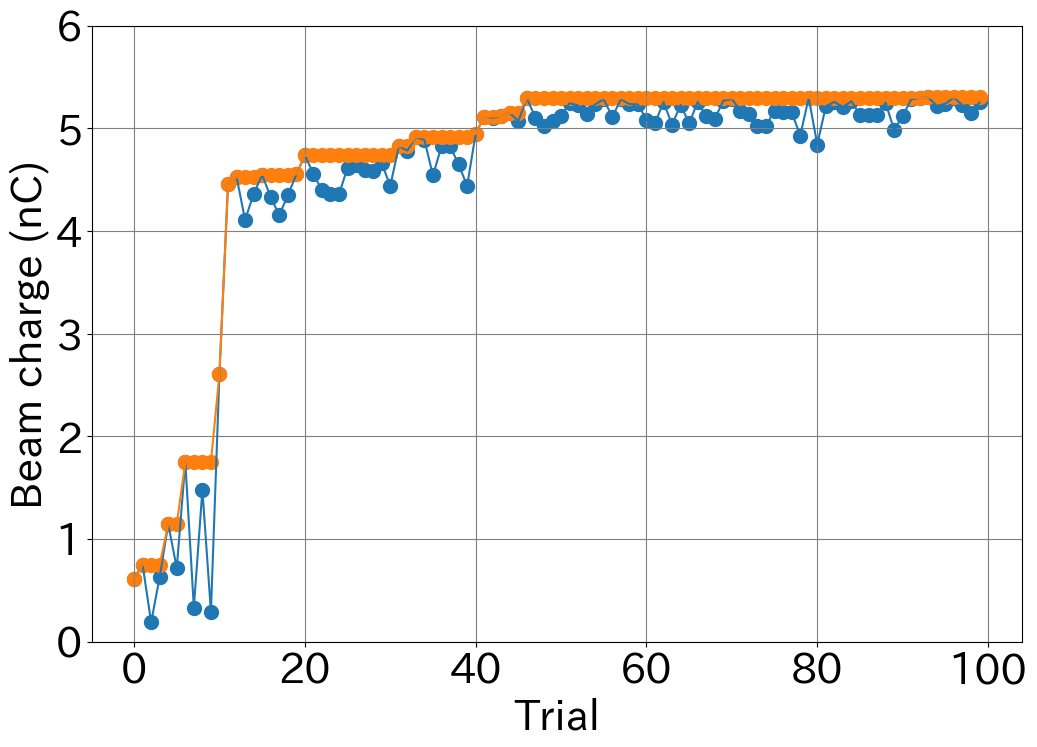

In [19]:
for i in range (5):
    
    fig1, ax1 = plt.subplots(1, 1, figsize=[12, 8])
    
    ax1.tick_params(labelsize=30)
    ax1.grid(which="major", color="gray", linestyle="-")
    ax1.set_xlabel("Trial", fontsize=30)
    ax1.set_ylabel("Beam charge (nC)", fontsize=30)
    ax1.set_ylim(0,6)
    ax1.plot(pdUCB2[i]["n"], pdUCB2[i]["y"], color="tab:blue")  # 線を描写
    ax1.scatter(pdUCB2[i]["n"], pdUCB2[i]["y"], color="tab:blue", s=100)  # 点を描写
    ax1.plot(pdUCB2[i]["n"], pdUCB2[i]["ymax"], color="tab:orange")
    ax1.scatter(pdUCB2[i]["n"], pdUCB2[i]["ymax"],color="tab:orange", s=100)